**Dalvin Colbert**
**D604 - Advanced Analytics**
**OHN1 Task 1: Neural Networks**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2
from skimage.util import random_noise
import albumentations as A
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import warnings
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
images = np.load("images.npy")
labels = pd.read_csv("labels.csv")
X = images
y = labels.to_numpy()

In [3]:
print(X.shape)
print(y.shape)

(4750, 128, 128, 3)
(4750, 1)


**Visualize the Distribution of Classes**

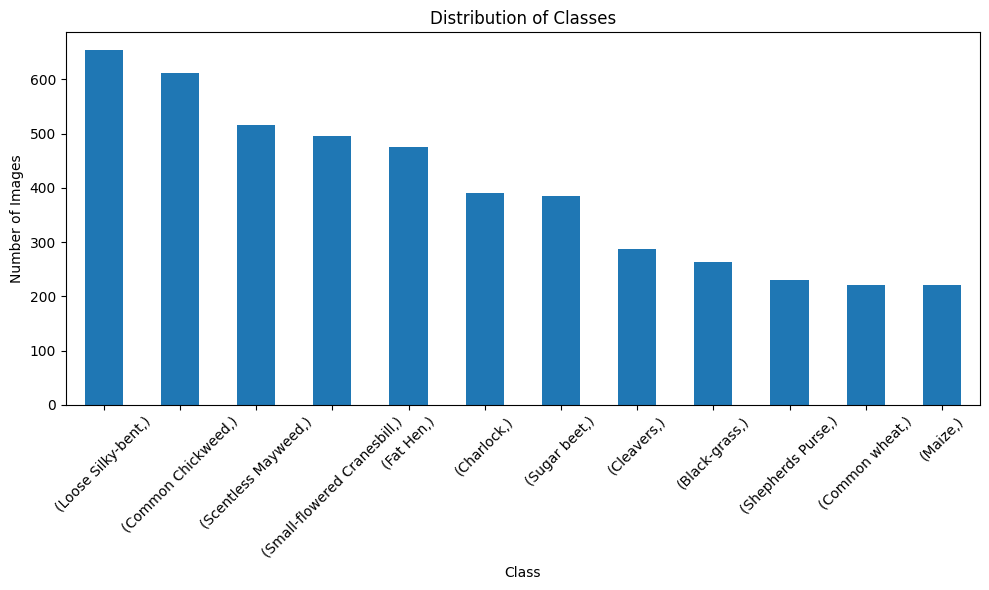

In [4]:
plt.figure(figsize=(10, 6))
labels.value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
\
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

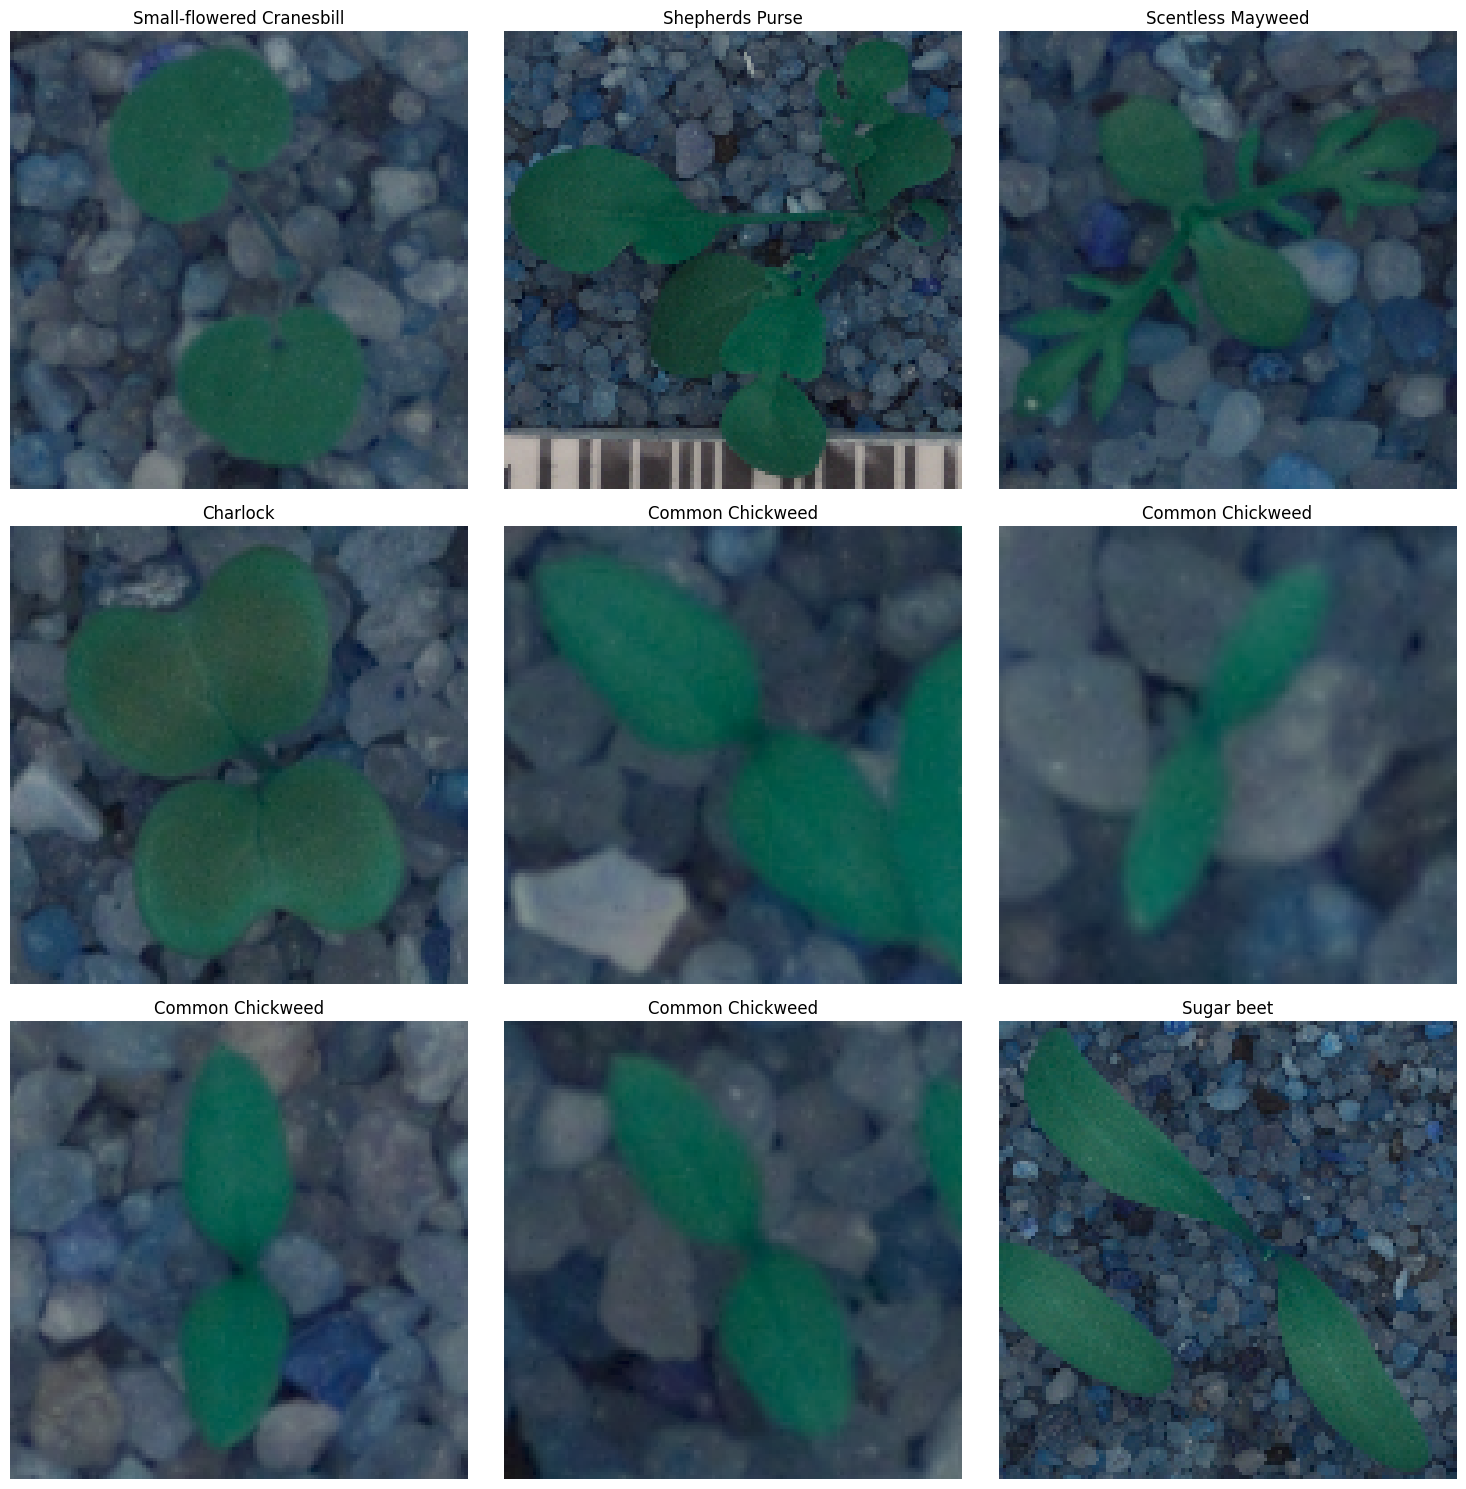

In [5]:
# Display sample images
def display_sample_images(images, labels, num_samples=9, figsize=(15, 15)):
    fig, axes = plt.subplots(3, 3, figsize=figsize)
    axes = axes.ravel()

    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        axes[i].imshow(images[idx])
        # Access the 'Label' column using .iloc to get the label by row index
        axes[i].set_title(labels['Label'].iloc[idx])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



display_sample_images(images, labels)

**Augmentation**

In [6]:
def create_augmentation_generator(images):
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Create augmentation generator
aug_gen = create_augmentation_generator(images)

**Normalization**

In [7]:

def normalize_images(images):
    return images.astype('float32') / 255.0

normalize_images(images)

array([[[[0.13725491, 0.20392157, 0.30588236],
         [0.14117648, 0.19215687, 0.29803923],
         [0.12156863, 0.1764706 , 0.27058825],
         ...,
         [0.30588236, 0.37254903, 0.44705883],
         [0.29803923, 0.3647059 , 0.43137255],
         [0.3137255 , 0.37254903, 0.42745098]],

        [[0.12941177, 0.18039216, 0.26666668],
         [0.14509805, 0.19607843, 0.28627452],
         [0.1882353 , 0.25490198, 0.3254902 ],
         ...,
         [0.31764707, 0.3764706 , 0.44313726],
         [0.2901961 , 0.34901962, 0.4117647 ],
         [0.3254902 , 0.37254903, 0.42745098]],

        [[0.13333334, 0.19607843, 0.26666668],
         [0.13725491, 0.20392157, 0.28235295],
         [0.27450982, 0.33333334, 0.39607844],
         ...,
         [0.3254902 , 0.38039216, 0.4392157 ],
         [0.30980393, 0.36862746, 0.42352942],
         [0.30980393, 0.36862746, 0.41960785]],

        ...,

        [[0.13725491, 0.19607843, 0.27058825],
         [0.16470589, 0.22352941, 0.28627452]

**Train**

In [22]:
# 4. Train-Validation-Test Split
def split_dataset(X, y, test_size=0.2, val_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, stratify=y_train, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

**Target Encoding**

In [23]:
# 5. Target Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
def encode_target(y):
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Reshape y to a 1D array if necessary
    if y.ndim > 1:
        y_reshaped = y.reshape(-1)
    else:
        y_reshaped = y

    # Fit and transform the labels to numerical values
    y_encoded = label_encoder.fit_transform(y_reshaped)

    # Apply to_categorical to the encoded labels
    return to_categorical(y_encoded)


In [24]:
# Main

# Normalize images
X_normalized = normalize_images(X)

# Split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X_normalized, y)

# Encode target
y_train_encoded = encode_target(y_train)
y_val_encoded = encode_target(y_val)
y_test_encoded = encode_target(y_test)






In [25]:
print("Dataset prepared successfully!")
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Train labels shape: {y_train_encoded.shape}")
print(f"Validation labels shape: {y_val_encoded.shape}")
print(f"Test labels shape: {y_test_encoded.shape}")

Dataset prepared successfully!
Train set shape: (3040, 128, 128, 3)
Validation set shape: (760, 128, 128, 3)
Test set shape: (950, 128, 128, 3)
Train labels shape: (3040, 12)
Validation labels shape: (760, 12)
Test labels shape: (950, 12)


In [26]:
import pickle

pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [27]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(12, activation = 'softmax'))

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
history = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])


Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9326 - loss: 0.1868 - val_accuracy: 0.7500 - val_loss: 1.0074
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9490 - loss: 0.1452 - val_accuracy: 0.7553 - val_loss: 0.9448
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9694 - loss: 0.0967 - val_accuracy: 0.7474 - val_loss: 1.0577
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9801 - loss: 0.0686 - val_accuracy: 0.7461 - val_loss: 1.1520
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9848 - loss: 0.0527 - val_accuracy: 0.7500 - val_loss: 1.2142
Epoch 5: early stopping


In [47]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (32, 126, 126, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 63, 63, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 61, 61, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 28, 28, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 14, 14, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 25088)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 128)                   │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 12)                    │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,918,566 (37.84 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,612,378 (25.22 MB)

In [48]:
model.save('Flower_class_model_98.keras')

In [49]:
prediction = model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step


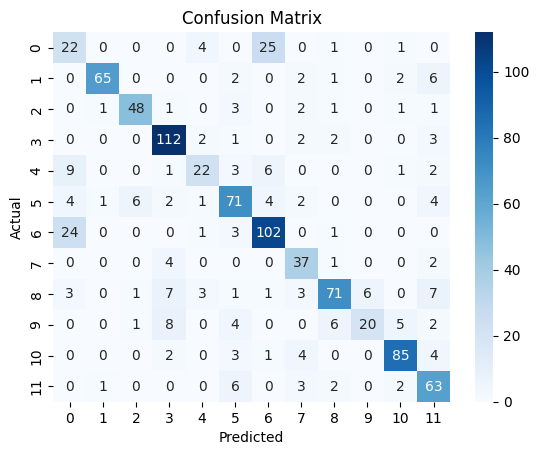

In [50]:
# Evaluate the model
# Convert predictions to class labels by selecting the index of the highest probability
predicted_labels = np.argmax(prediction, axis=1)

# Convert one-hot encoded y_test_encoded back to class labels
actual_labels = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(actual_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [55]:
# Accuracy
print("Model metrics:")
accuracy = accuracy_score(actual_labels, predicted_labels)
print("\nAccuracy:", accuracy)

# Precision (use 'average' parameter for multi-class)
precision = precision_score(actual_labels, predicted_labels, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(actual_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# F1-Score
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
print("F1-Score:", f1)

# Compute MAE using true labels and predictions
mae = mean_absolute_error(y_test_encoded, prediction)
print(f"Mean Absolute Error: {mae}")

Model metrics:

Accuracy: 0.7557894736842106
Precision: 0.7644149039455447
Recall: 0.7557894736842106
F1-Score: 0.7546335398976686
Mean Absolute Error: 0.043995107270418


In [37]:
datasets = [X_normalized, X_train, X_val, X_test, y_train, y_val, y_test, y_train_encoded, y_val_encoded, y_test_encoded]
dataset_names = ['X_normalized', 'X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test', 'y_train_encoded', 'y_val_encoded', 'y_test_encoded']

# Use zip to iterate through both datasets and their names
for dataset, name in zip(datasets, dataset_names):
    # Convert NumPy arrays to Pandas DataFrames before saving to CSV
    if isinstance(dataset, np.ndarray):
        # Reshape if necessary to ensure compatible dimensions
        if dataset.ndim > 2:  # Check if array has more than 2 dimensions
            dataset = dataset.reshape(dataset.shape[0], -1)
        df = pd.DataFrame(dataset)
        df.to_csv(f"{name}.csv", index=False)
    else:
        # If it's already a DataFrame, save directly
        dataset.to_csv(f"{name}.csv", index=False)

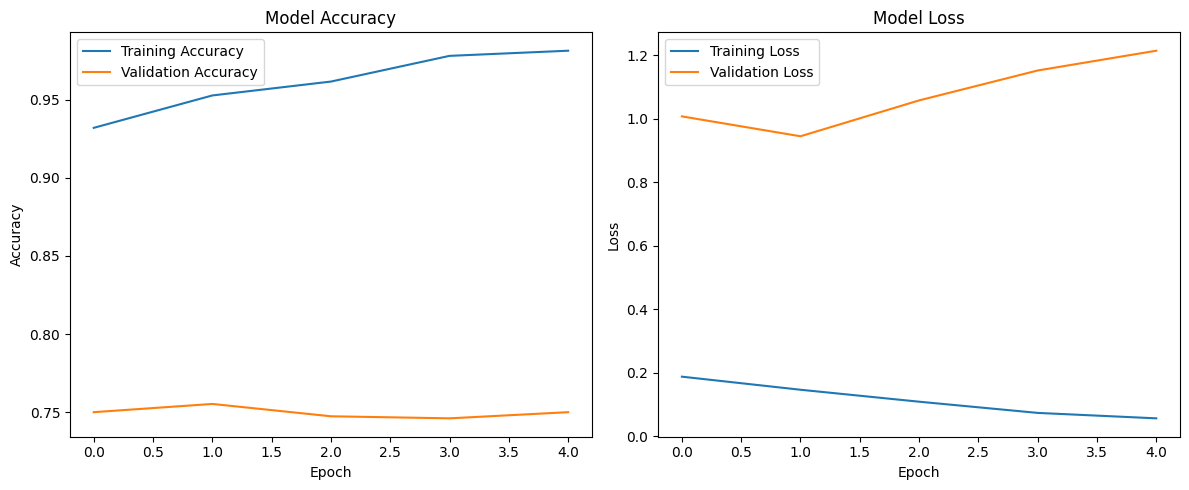

In [52]:

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
